In [1]:
from vismanip import TransitVis
import struct
import datetime
import pytz
import numpy as np

In [2]:
fvis = open('/project/druhe/SB281-202011112023-lba_outer.vis', 'rb')

In [3]:
LEN_HDR = 512
nant = 576
nbline  = nant*(nant+1)/2
pol2rec = 2
# 8 due to float complex.
nbline = int(nant * (nant + 1) / 2)
nchan = 3
payload = nbline * nchan * pol2rec * 8
recsize = int(payload + LEN_HDR)
nweight =(12*13)/2
sub = 281
freq = sub * 195312.5
npol = 2
norigchan = nchan
ateamflux       = np.zeros ( (npol, 5) ) 


In [4]:
def parse_vis_hdr(hdr):
    magic, t0, t1 = struct.unpack("<Qdd", hdr[0:24])
    print(magic, t0, t1)
    weights = struct.unpack (("<%di" % nweight), 
                                header[148:int(148+nweight*4)])
    return (magic, datetime.datetime.utcfromtimestamp(t0).replace(tzinfo=\
        pytz.utc), datetime.datetime.utcfromtimestamp(t1).replace(tzinfo=\
        pytz.utc), sub, nant, npol, norigchan, 
        ateamflux, 0, 0, weights, freq)

In [5]:
recbuf = fvis.read(recsize)

In [6]:
header = recbuf[0:512]
data = recbuf[512:]

In [7]:
m, trec, t1, _,_,_,_,_,_,_,_,_ = parse_vis_hdr(header)
vis = np.reshape (np.fromstring(data, 
                dtype=np.complex64), (nbline, nchan, npol) )


1081992285376802818 1605126360.0 1605126361.006633


In [32]:
vis.shape

(166176, 3, 2)

In [9]:
vis[0]

array([[5.9247534e+09       +0.j, 1.4685802e+08-14752573.j],
       [1.4685802e+08+14752573.j, 8.1384612e+09       +0.j],
       [5.9311514e+09       +0.j, 1.7207042e+08-27720678.j]],
      dtype=complex64)

In [33]:
len(np.all(vis == 0, axis=(-1, -2)).nonzero()[0])

20634

In [20]:
vis.hdr[0:512]

b'\x02\xf0\x98;@\x02\x04\x0f\x00\x00\x006\x12\xeb\xd7A\xadl@6\x12\xeb\xd7A\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x00\x00\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x00\x00\x0f\x03\x

In [34]:
import pandas as pd

In [37]:
with open('a12-AntennaField.conf', 'r') as f:
    lines = f.readlines()

In [81]:
normal_vector = np.array(lines[7].split(' '))[[4, 7, 10]].astype(float)
normal_vector

array([0.598753, 0.072099, 0.797682])

In [116]:
rotation_matrix = lines[11:14]

In [117]:
rotation_matrix = [r.rstrip('\n').split(' ') for r in rotation_matrix]

In [118]:
rotation_matrix = np.array([[float(l[i]) for i in range(len(l)) if len(l[i]) > 0] for l in rotation_matrix])

In [119]:
rotation_matrix

array([[-1.19595e-01, -7.91954e-01,  5.98753e-01],
       [ 9.92823e-01, -9.54190e-02,  7.20990e-02],
       [ 3.30000e-05,  6.03078e-01,  7.97682e-01]])

In [135]:
rotation_matrix = pd.read_csv('a12-AntennaField.conf', skiprows=11, nrows=3, header=None, sep='  ')

In [148]:
xyz = pd.read_csv('a12-AntennaField.conf', skiprows=19, nrows=576, header=None, sep='\s+', names=['x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2'])

In [150]:
import matplotlib.pyplot as plt

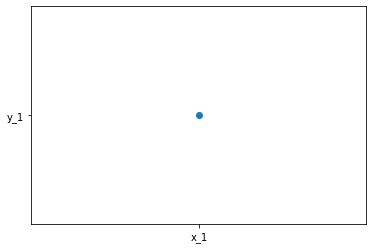

In [154]:
plt.scatter(*xyz[['x_1', 'y_1']])

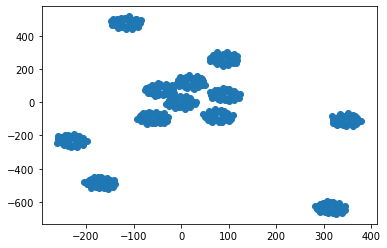

In [158]:
plt.scatter(xyz['x_1'], xyz['y_2'])